In [1]:
import tensorflow as tf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import log_loss
import numpy as np
import pickle
from sklearn.externals import joblib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import explained_variance_score, mean_squared_error

/home/ruby/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Load MNIST data from tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
# mnist_one_hot = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
train_images = mnist.train.images
train_labels = mnist.train.labels
test_images = mnist.test.images
test_labels = mnist.test.labels

In [6]:
def trainRandomForest(index):
    model = RandomForestClassifier(n_estimators=index,n_jobs=4)
#     print index
#     model.random_state(index)
    model.fit(train_images, train_labels)
    return model

models = {}
for i in [3,25,77,99]:
    print i
    model = trainRandomForest(i)
    models[i] = model

# joblib.dump(models, 'random_forest_models.pkl')
# print models

3
25
77
99


In [ ]:
clf.estimators_[i].predict_proba(np.reshape(test_samples[idx],(1,-1)))[0]

In [51]:
print test_labels[7]
print models[3].estimators_[0].predict_proba(np.reshape(test_images[7],(1,-1)))[0]
print models[3].estimators_[1].predict_proba(np.reshape(test_images[7],(1,-1)))[0]
print models[3].estimators_[2].predict_proba(np.reshape(test_images[7],(1,-1)))[0]
print models[3].predict_log_proba(np.reshape(test_images[7],(1,-1)))

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[       -inf        -inf        -inf        -inf -1.09861229 -1.09861229
         -inf        -inf        -inf -1.09861229]]


/home/ruby/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:623: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


In [53]:
print test_labels[8]
print models[3].estimators_[0].predict_proba(np.reshape(test_images[8],(1,-1)))[0]
print models[3].estimators_[1].predict_proba(np.reshape(test_images[8],(1,-1)))[0]
print models[3].estimators_[2].predict_proba(np.reshape(test_images[8],(1,-1)))[0]
print models[3].predict_log_proba(np.reshape(test_images[8],(1,-1)))
print models[3].predict(np.reshape(test_images[8],(1,-1)))

5
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[[       -inf        -inf        -inf        -inf -1.09861229        -inf
  -1.09861229        -inf -1.09861229        -inf]]
[4]


In [35]:
def plot_uncertainty(model,test_images,test_labels):
    predicted_output = model.predict_proba(test_images)
    
    zero = np.where(test_labels == 0)[0]
    one = np.where(test_labels == 1)[0]
    two = np.where(test_labels == 2)[0]
    three = np.where(test_labels == 3)[0]
    four = np.where(test_labels == 4)[0]
    five = np.where(test_labels == 5)[0]
    six = np.where(test_labels == 6)[0]
    seven = np.where(test_labels == 7)[0]
    eight = np.where(test_labels == 8)[0]
    nine = np.where(test_labels == 9)[0]
    fig, ax = plt.subplots(1,figsize=(8,6))
    
    ax.hist(predicted_output[zero, 0], histtype='step', label='zero')
    ax.hist(predicted_output[one, 1], histtype='step', label='one')
    ax.hist(predicted_output[two, 2], histtype='step', label='two')
    ax.hist(predicted_output[three, 3], histtype='step', label='three')
    ax.hist(predicted_output[four, 4], histtype='step', label='four')
    ax.hist(predicted_output[five, 5], histtype='step', label='five')
    ax.hist(predicted_output[six, 6], histtype='step', label='six')
    ax.hist(predicted_output[seven, 7], histtype='step', label='seven')
    ax.hist(predicted_output[eight, 8], histtype='step', label='eight')
    ax.hist(predicted_output[nine, 9], histtype='step', label='nine')

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
              ncol=5, fancybox=True, shadow=True)
    
    ax.set_xlabel('Prediction (Classes probability)')
    ax.set_ylabel('Number of observations')

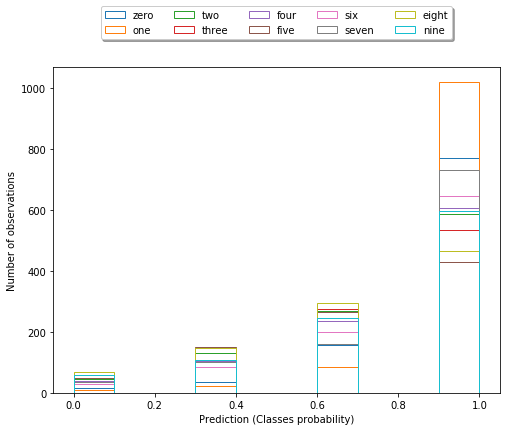

In [36]:
plot_uncertainty(models[3],test_images,test_labels)

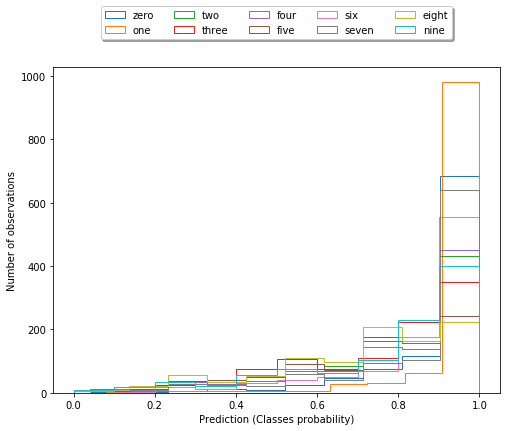

In [37]:
plot_uncertainty(models[25],test_images,test_labels)

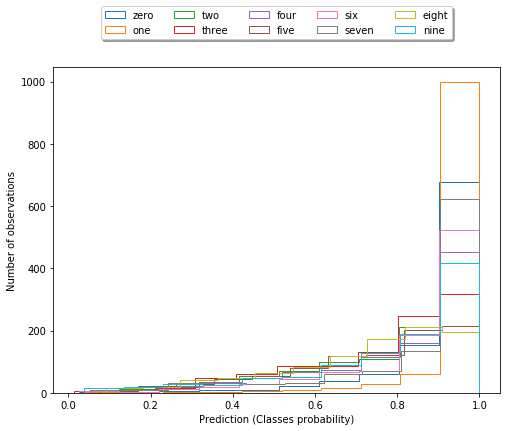

In [38]:
plot_uncertainty(models[77],test_images,test_labels)

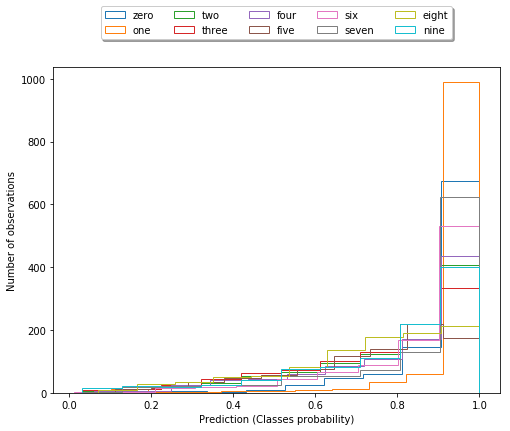

In [39]:
plot_uncertainty(models[99],test_images,test_labels)

In [22]:
print models[25].score(test_images,test_labels)

0.9631


In [23]:
print models[77].score(test_images,test_labels)

0.9686


In [24]:
print models[99].score(test_images,test_labels)

0.9675


In [63]:

# models[0].predict(test_images)
print models[0].score(test_images, test_labels)
print models[0].estimators_[0].score(test_images, test_labels)
# models[0].predict(test_images)
# print models[1].score(test_images, test_labels)
print models[0].estimators_[1].score(test_images, test_labels)

0.822
0.8185
0.8216


In [3]:
num_of_data = 200
x = np.linspace(-4,4,num_of_data)
noise = np.random.normal(0,9,num_of_data)
y = x**3
y_noise = y + noise

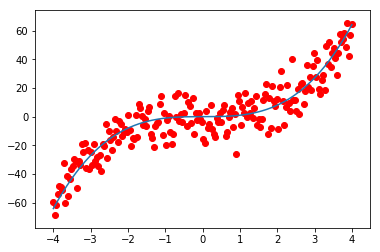

In [4]:
plt.plot(x,y)
plt.scatter(x,y_noise,color="red")

In [6]:
sinmodel = RandomForestRegressor(n_estimators=3,n_jobs=4)
sinmodel.fit(x.reshape(200,1),y.reshape(200,1))

/home/ruby/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [7]:
test_x = np.linspace(-6,6,200)
test_y = test_x**3

In [18]:
test_predict = sinmodel.predict(test_x.reshape(200,1))

In [26]:
my_mean = test_predict.mean()
my_mean

0.41179361247370705

In [22]:
print my_mean + 3 * test_predict.std()
print my_mean - 3 * test_predict.std()

124.6078453893619
-123.7842581644145


In [25]:
import forestci as fci

In [47]:
variance = fci.random_forest_error(sinmodel, x.reshape(200,1),test_x.reshape(200,1))
print variance

[16233.0185749  16233.0185749  16233.0185749  16233.0185749
 16233.0185749  16233.0185749  16233.0185749  16233.0185749
 16233.0185749  16233.0185749  16233.0185749  16233.0185749
 16233.0185749  16233.0185749  16233.0185749  16233.0185749
 16233.0185749  16233.0185749  16233.0185749  16233.0185749
 16233.0185749  16233.0185749  16233.0185749  16233.0185749
 16233.0185749  16233.0185749  16233.0185749  16233.0185749
 16233.0185749  16233.0185749  16233.0185749  16233.0185749
 16233.0185749  16233.0185749  16113.69306908 15901.80806855
 15704.90062931 15488.73366684 15346.60943339 15123.78084469
 14962.65802111 14842.57904881 14692.25573717 14614.90722949
 14465.12276022 14390.20523487 14332.79779224 14230.72719437
 14167.93673724 14089.62254399 14044.06239236 13988.19910659
 13931.79663984 13898.85164027 13852.91969301 13818.95435371
 13785.24106021 13760.98766967 13738.69574606 13712.52191919
 13691.41356828 13677.73883832 13658.89073502 13649.93976701
 13635.52469012 13625.12108888 1

In [35]:
mean = test_predict.mean()

In [46]:
std = np.sqrt(variance)
print y - std
print 


[-191.23670505 -189.32638529 -187.45446261 -185.62054719 -183.82424922
 -182.06517888 -180.34294634 -178.6571618  -177.00743542 -175.39337741
 -173.81459792 -172.27070716 -170.7613153  -169.28603252 -167.844469
 -166.43623493 -165.06094049 -163.71819586 -162.40761122 -161.12879676
 -159.88136265 -158.66491907 -157.47907622 -156.32344427 -155.1976334
 -154.1012538  -153.03391564 -151.99522912 -150.9848044  -150.00225168
 -149.04718113 -148.11920294 -147.21792729 -146.34296436 -145.10932446
 -143.59997717 -142.16079785 -140.67964707 -139.46283011 -138.000458
 -136.76275811 -135.6829559  -134.52272714 -133.62884379 -132.51107972
 -131.66714836 -130.90343762 -130.00761077 -129.26570199 -128.49003084
 -127.84607537 -127.18561769 -126.54182252 -125.99732492 -125.42581409
 -124.91329833 -124.41886542 -123.97413731 -123.55273276 -123.13390548
 -122.74844713 -122.40426753 -122.0570075  -121.75889733 -121.45590836
 -121.18075756 -120.93559383 -120.68842449 -120.46956221 -120.26376028
 -120.07340

array([381.84757694, 381.84757694, 381.84757694, 381.84757694,
       381.84757694, 381.84757694, 381.84757694, 381.84757694,
       381.84757694, 381.84757694, 381.84757694, 381.84757694,
       381.84757694, 381.84757694, 381.84757694, 381.84757694,
       381.84757694, 381.84757694, 381.84757694, 381.84757694,
       381.84757694, 381.84757694, 381.84757694, 381.84757694,
       381.84757694, 381.84757694, 381.84757694, 381.84757694,
       381.84757694, 381.84757694, 381.84757694, 381.84757694,
       381.84757694, 381.84757694, 380.69377734, 378.6362563 ,
       376.71380935, 374.59118772, 373.18847662, 370.97717866,
       369.36914538, 368.16522261, 366.65160708, 365.86978421,
       364.35024498, 363.58729919, 363.00127998, 361.95634666,
       361.31177119, 360.50568172, 360.03568185, 359.45828738,
       358.87416189, 358.53238002, 358.05517886, 357.70175273,
       357.35053446, 357.09755931, 356.86485303, 356.59134621,
       356.37058331, 356.22746319, 356.03007779, 355.93

In [44]:

error = mean_squared_error(test_y.reshape(1,200),test_predict.reshape(1,200),multioutput="raw_values")
print error
error = error.reshape(200,1)
upper = y + error
lower = y - error

[2.35685674e+04 2.16305400e+04 1.98121131e+04 1.81080201e+04
 1.65131593e+04 1.50225900e+04 1.36315294e+04 1.23353494e+04
 1.11295730e+04 1.00098716e+04 8.97206118e+03 8.01209981e+03
 7.12608401e+03 6.31024596e+03 5.56095033e+03 4.87469133e+03
 4.24808969e+03 3.67788975e+03 3.16095654e+03 2.69427290e+03
 2.27493663e+03 1.90015773e+03 1.56725559e+03 1.27365627e+03
 1.01688980e+03 7.94587497e+02 6.04479369e+02 4.44391490e+02
 3.12243450e+02 2.06045821e+02 1.23897673e+02 6.39841094e+01
 2.45738462e+01 4.01682389e+00 8.30665081e-02 3.97915004e-01
 7.14682238e-02 6.31305096e-02 6.65824828e-02 5.36989807e-02
 4.48902494e-03 4.98163766e-02 5.65866966e-03 2.33473235e-01
 1.16948581e-01 3.62586329e-02 4.67820985e-03 3.00891859e-02
 4.43580520e-03 2.75882871e-02 2.38669037e-02 2.25937051e-02
 2.67551785e-03 2.37225881e-02 9.63028906e-02 1.70590866e-03
 4.55232800e-02 7.54139910e-02 3.68704806e-02 9.89040420e-03
 1.00904725e-03 1.21808701e-03 4.76068376e-02 6.42589145e-04
 7.42231217e-03 5.647922

In [45]:
lower

array([[-23632.56737596, -23630.6570562 , -23628.78513352, ...,
        -23508.3496184 , -23506.47769572, -23504.56737596],
       [-21694.54004154, -21692.62972178, -21690.7577991 , ...,
        -21570.32228398, -21568.4503613 , -21566.54004154],
       [-19876.11307559, -19874.20275583, -19872.33083315, ...,
        -19751.89531803, -19750.02339535, -19748.11307559],
       ...,
       [-19821.29252468, -19819.38220492, -19817.51028224, ...,
        -19697.07476712, -19695.20284444, -19693.29252468],
       [-21637.25719373, -21635.34687397, -21633.47495129, ...,
        -21513.03943618, -21511.1675135 , -21509.25719373],
       [-23572.77172435, -23570.86140459, -23568.98948191, ...,
        -23448.5539668 , -23446.68204412, -23444.77172435]])

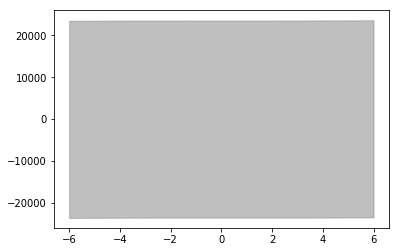

In [47]:
plt.fill_between(test_x, lower.tolist()[0], upper.tolist()[0], color='grey', alpha=0.5)

In [121]:
var = explained_variance_score(test_y, test_predict)

In [127]:
mean = test_predict.mean()
sinmodel.mean

In [13]:
def pred_ints(model, X, percentile=95):
    err_down = []
    err_up = []
    for x in range(len(X)):
        preds = []
        for pred in model.estimators_:
            preds.append(pred.predict(X[x])[0])
        err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
        err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))
    return err_down, err_up

In [152]:
def my_pred_ints(model, X,Y, percentile=95):
    err_down = []
    err_up = []
    for x in range(len(X)):
        
        pred_y = model.predict(X[x])[0]
        print Y[x]
        print mean_squared_error(Y[x],pred_y)
#         preds = []
#         for pred in model.estimators_:
#             preds.append(pred.predict(X[x])[0])
#         err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
#         err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))
#     return err_down, err_up

In [155]:
pred_y = model.predict(test_x)

ValueError: Expected 2D array, got 1D array instead:
array=[-8.         -7.919598   -7.839196   -7.758794   -7.678392   -7.59799
 -7.517588   -7.437186   -7.356784   -7.276382   -7.19598    -7.1155777
 -7.035176   -6.954774   -6.874372   -6.7939696  -6.7135677  -6.633166
 -6.552764   -6.472362   -6.3919597  -6.311558   -6.231156   -6.150754
 -6.0703516  -5.9899497  -5.909548   -5.829146   -5.7487435  -5.6683416
 -5.5879397  -5.507538   -5.4271355  -5.3467336  -5.2663317  -5.18593
 -5.1055274  -5.0251255  -4.9447236  -4.8643217  -4.78392    -4.7035174
 -4.6231155  -4.5427136  -4.4623117  -4.3819094  -4.3015075  -4.2211056
 -4.1407037  -4.0603013  -3.9798994  -3.8994975  -3.8190954  -3.7386935
 -3.6582913  -3.5778894  -3.4974875  -3.4170854  -3.3366835  -3.2562814
 -3.1758795  -3.0954773  -3.0150754  -2.9346733  -2.8542714  -2.7738693
 -2.6934674  -2.6130652  -2.5326633  -2.4522612  -2.3718593  -2.2914572
 -2.2110553  -2.1306534  -2.0502512  -1.9698492  -1.8894472  -1.8090452
 -1.7286432  -1.6482412  -1.5678391  -1.4874371  -1.4070352  -1.3266332
 -1.2462312  -1.1658292  -1.0854272  -1.0050251  -0.92462313 -0.8442211
 -0.7638191  -0.6834171  -0.60301507 -0.52261305 -0.44221106 -0.36180905
 -0.28140703 -0.20100503 -0.12060302 -0.040201    0.040201    0.12060302
  0.20100503  0.28140703  0.36180905  0.44221106  0.52261305  0.60301507
  0.6834171   0.7638191   0.8442211   0.92462313  1.0050251   1.0854272
  1.1658292   1.2462312   1.3266332   1.4070352   1.4874371   1.5678391
  1.6482412   1.7286432   1.8090452   1.8894472   1.9698492   2.0502512
  2.1306534   2.2110553   2.2914572   2.3718593   2.4522612   2.5326633
  2.6130652   2.6934674   2.7738693   2.8542714   2.9346733   3.0150754
  3.0954773   3.1758795   3.2562814   3.3366835   3.4170854   3.4974875
  3.5778894   3.6582913   3.7386935   3.8190954   3.8994975   3.9798994
  4.0603013   4.1407037   4.2211056   4.3015075   4.3819094   4.4623117
  4.5427136   4.6231155   4.7035174   4.78392     4.8643217   4.9447236
  5.0251255   5.1055274   5.18593     5.2663317   5.3467336   5.4271355
  5.507538    5.5879397   5.6683416   5.7487435   5.829146    5.909548
  5.9899497   6.0703516   6.150754    6.231156    6.311558    6.3919597
  6.472362    6.552764    6.633166    6.7135677   6.7939696   6.874372
  6.954774    7.035176    7.1155777   7.19598     7.276382    7.356784
  7.437186    7.517588    7.59799     7.678392    7.758794    7.839196
  7.919598    8.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
lower,upper = pred_ints(sinmodel,test_x)

In [16]:
print len(lower)
print len(upper)
print test_x.shape

200
200
(200,)


124.64842004398179


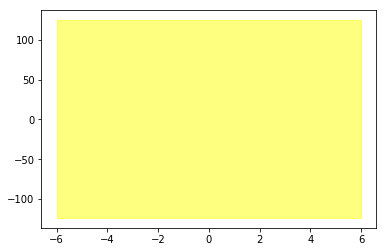

In [54]:
def ensemble_mean_var(sinmodel, xs):
    en_mean = 0
    en_var = 0
    

    for model in sinmodel.estimators_:
        predicted = model.predict(xs.reshape(200,1))
        mean = predicted.mean()
        var = predicted.var()
        en_mean += mean
        en_var += var + mean**2

    en_mean /= len(sinmodel.estimators_)
    en_var /= len(sinmodel.estimators_)
    en_var -= en_mean**2
#     print en_mean
#     print en_var
    return en_mean, en_var

def test_ensemble(sinmodel,test_x,test_y):
    test_xs = test_x
    test_ys = test_y
    
    mean, var = ensemble_mean_var(sinmodel, test_xs)
    std = np.sqrt(var)
    upper = mean + 3*std
    lower = mean - 3*std
    
#     test_xs_scaled = dataLoader.input_mean + dataLoader.input_std*test_xs

#     plt.plot(test_xs_scaled, test_ys, 'b-')
#     plt.plot(test_xs_scaled, mean, 'r-')
    print upper
    plt.fill_between(test_x, lower, upper, color='yellow', alpha=0.5)
    plt.show()
    
test_ensemble(sinmodel,test_x,test_y)

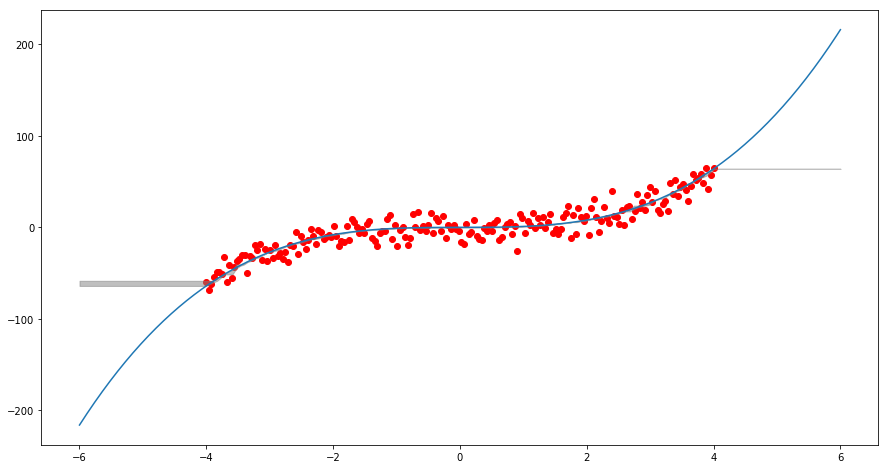

In [57]:
plt.figure(figsize=(15,8))
plt.plot(test_x,test_y)
plt.scatter(x,y_noise,color="red")
plt.fill_between(test_x, lower, upper, color='grey', alpha=0.5)

In [126]:
std = np.sqrt(var)
upper = mean + 3*std
lower = mean - 3*std
print upper
print lower
# plt.plot(test_xs_scaled, test_ys, 'b-')
# plt.plot(test_xs_scaled, mean, 'r-')

plt.fill_between(test_x, lower[:, 0], upper[:, 0], color='yellow', alpha=0.5)

1.2369533569699387
-2.317252030239151


IndexError: invalid index to scalar variable.